In [2]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [5]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

df = yf.Ticker("BBRI.JK")
df = df.history(period="max")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-10 00:00:00+07:00,3790.0,3810.0,3730.0,3760.0,232192200,0.0,0.0
2025-03-11 00:00:00+07:00,3700.0,3790.0,3660.0,3790.0,273961800,0.0,0.0
2025-03-12 00:00:00+07:00,3810.0,3920.0,3810.0,3890.0,271631200,0.0,0.0
2025-03-13 00:00:00+07:00,3960.0,3970.0,3800.0,3800.0,209225700,0.0,0.0
2025-03-14 00:00:00+07:00,3750.0,3840.0,3750.0,3750.0,156131900,0.0,0.0


In [6]:
del df["Dividends"]
del df["Stock Splits"]

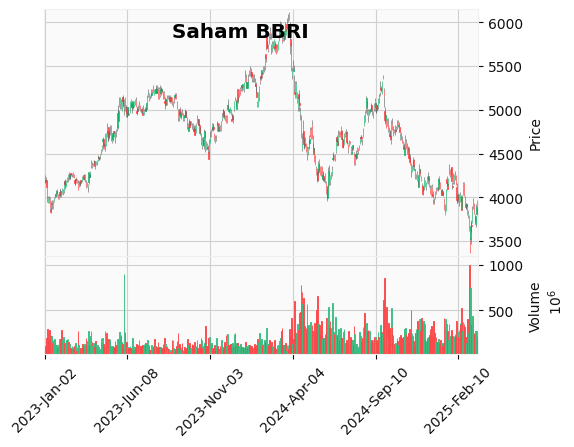

<function matplotlib.pyplot.show(close=None, block=None)>

In [8]:
dfVisual = df.loc["2023-01-01":].copy()

mpf.plot(dfVisual, type='candle', style='yahoo', title='Saham BBRI',
         ylabel='Price', ylabel_lower='Volume', figsize=(5,4),
         volume=True, tight_layout=True)

mpf.show

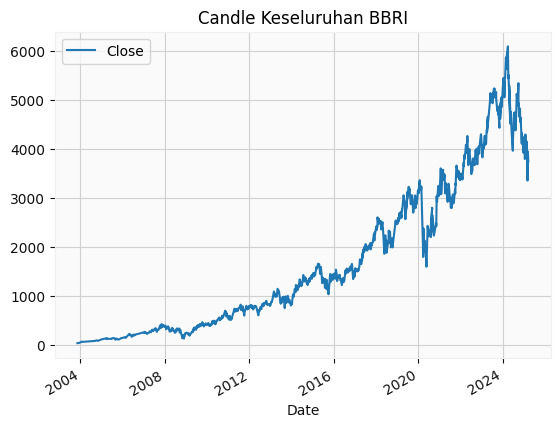

In [9]:
df.plot.line(y="Close", use_index=True)
plt.title("Candle Keseluruhan BBRI")
plt.show()

In [10]:
df = df.loc["2020-01-01":].copy()

In [11]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Memuat data
prices = df['AdjustedClose'].values.reshape(-1, 1)

In [12]:
# Menormalkan data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Membagi data menjadi data latih dan data uji
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [13]:
# Membuat dataset latih dan uji
def create_dataset(data, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback):
      X.append(data[i:i+lookback])
      Y.append(data[i+lookback])
    return np.array(X), np.array(Y)

lookback = 10 # temporary
train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)


In [14]:
# Membangun model RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, input_shape=(lookback, 1)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# train model
model.fit(train_X, train_Y, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4454
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9066e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8845e-04
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8985e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8077e-04
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2287e-04
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4393e-04
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4452e-04
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3739e-0

In [15]:
# Melakukan prediksi
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

# Menormalkan kembali data
train_preds = scaler.inverse_transform(train_preds)
train_Y = scaler.inverse_transform(train_Y)
test_preds = scaler.inverse_transform(test_preds)
test_Y = scaler.inverse_transform(test_Y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [16]:
# Menghitung metrik evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_Y, test_preds)
mae = mean_absolute_error(test_Y, test_preds)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 20407.114103124164
Mean Absolute Error (MAE): 111.74266367510333


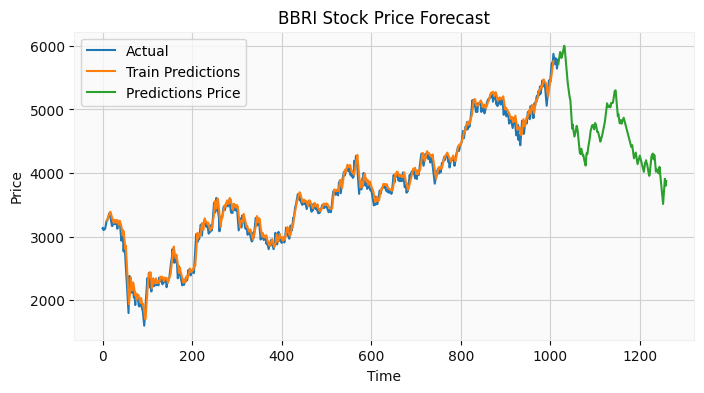

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(prices[:train_size + lookback], label='Actual')
plt.plot(range(lookback, train_size), train_preds, label='Train Predictions')
plt.plot(range(train_size + lookback, len(prices)), test_preds, label='Predictions Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("BBRI Stock Price Forecast")
plt.legend()
plt.show()

In [18]:
# Mengambil periode yang sesuai untuk Test Predictions dan Actual
test_actual = prices[train_size + lookback:]

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({'Harga Sebenarnya': test_actual.flatten(),
                              'Harga Prediksi': test_preds.flatten()})

comparison_df


,Harga Sebenarnya,Harga Prediksi
0,5803.683594,5711.901367
1,5920.223145,5762.838379
2,5966.839355,5821.652832
3,5952.321289,5868.489746
4,5782.946289,5902.084961
...,...,...
237,3760.000000,3865.832275
238,3790.000000,3909.860840
239,3890.000000,3823.131836
240,3800.000000,3802.702148
